In [1]:
# Import all the package you need to use:

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
# Load the data:

In [4]:
with open('P2data1.txt') as csv_file:
    dataset = list(csv.reader(csv_file, delimiter=','))
    data=np.array([np.array(xi) for xi in dataset])
    data=np.transpose(data)
    X1=data[0]
    X2=data[1]
    X=np.column_stack((X1,X2)).astype(np.float)
    Y=data[2].astype(np.float)
    n=len(X)
    
    

In [5]:
# Plot the data:

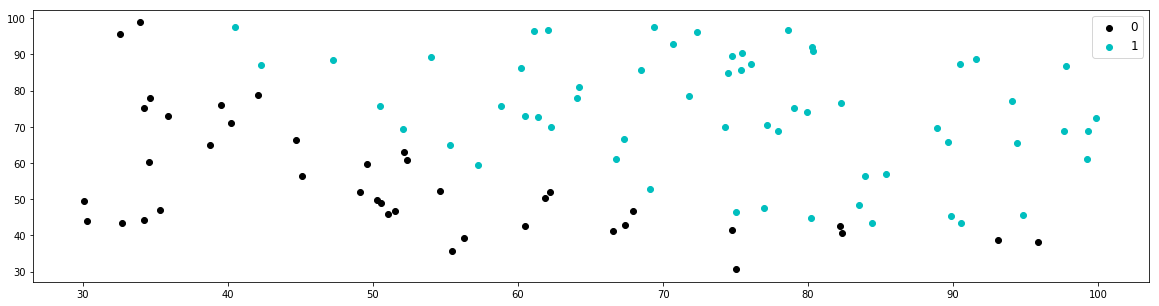

In [6]:
plt.figure(figsize=(20,5))
#plt.plot(X,Y)
plt.scatter(X[Y==0][:,0], X[Y==0][:,1],color='k')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1],color='c')
plt.legend(['0','1'], fontsize='12')
plt.show()

In [7]:
# Define the sigmoid function:

In [8]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

    

In [9]:
# Define the compute cost function:

In [10]:
def compute_cost(theta, X, Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y=Y.reshape(-1,1)
    Y = np.matrix(Y)
    J =((np.multiply(-Y, np.log(sigmoid(X * theta.T))))-(np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T))))).mean()
    return J

In [11]:
# Define the compute gradient function:

In [12]:
def gradient(theta, X, Y):
    theta = np.matrix(theta)
    
    X = np.matrix(X)
    Y=Y.reshape(-1,1)
    Y = np.matrix(Y)
    
    k=theta.shape[1]
    g = np.zeros(k)
    #print(theta, X)
    p = sigmoid(X*theta.T) -Y
    
    for i in range(k):
        g[i] = np.multiply(p, X[:,i]).mean()
        
    
    return g

In [13]:
# Compute cost and gradient (The initial cost should be 0.69314718):

In [14]:
ones=(np.ones(n)).reshape(-1,1)
X=np.hstack((ones,X))
theta=np.zeros(3)
g=gradient(theta, X, Y)
#X.shape, Y.shape, theta.shape
cost=compute_cost(theta, X, Y)
print("The initial cost is:", cost)
print("The gradient is:", g)



The initial cost is: 0.6931471805599453
The gradient is: [ -0.1        -12.00921659 -11.26284221]


In [15]:
# Optimize the cost to find the minimum cost by using fmin_tnc:
# The optimal cost should be 0.20349

weights = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X, Y))
w=weights[0]
print('The optimal weights are:',w)
print('The optimal cost is:',compute_cost(w, X, Y))

The optimal weights are: [-25.16131876   0.20623159   0.20147149]
The optimal cost is: 0.20349770158947397


In [16]:
# Define a predict function to calculate the result:

In [17]:
def predict(w, X):
    X=np.matrix(X)
    h=sigmoid(X*w.T)
    h1=h.round()
    A=(h, )
    return h1

In [18]:
# Find the accuracy of the logistic regression:

In [19]:
accuracy=predict(X,w)
p=(accuracy == Y).mean()
print('The accuracy from  calculation of logistic regression is:',p*100)

The accuracy from  calculation of logistic regression is: 89.0


In [20]:
# Plot the data and boundary:

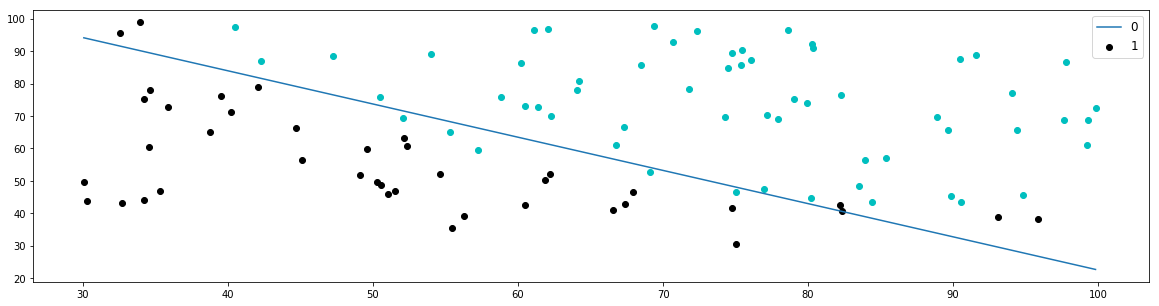

In [21]:
import scipy
with open('P2data1.txt') as csv_file:
    dataset = list(csv.reader(csv_file, delimiter=','))
    data=np.array([np.array(xi) for xi in dataset])
    data=np.transpose(data)
    X1=data[0]
    X2=data[1]
    X=np.column_stack((X1,X2)).astype(np.float)
    Y=data[2].astype(np.float)
plt.figure(figsize=(20,5))

plt.scatter(X[Y==0][:,0], X[Y==0][:,1],color='k')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1],color='c')
xPlot = scipy.linspace(min(X[:, 0]), max(X[:, 0]), 100)
plt.plot(xPlot, -w[0] / w[2] - w[1] / w[2] * xPlot)
plt.legend(['0','1'], fontsize='12')
plt.show()